In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

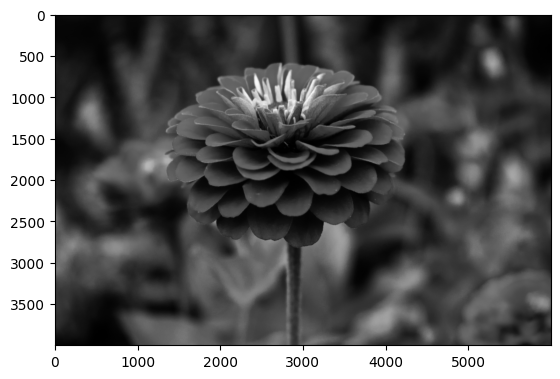

In [34]:
image = cv2.imread('img.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image_gray, cmap="gray")
plt.show()

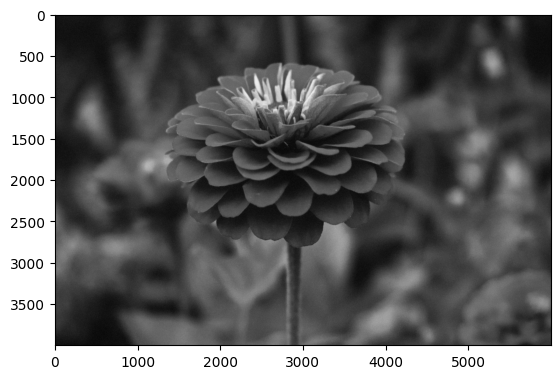

In [35]:
mean = 0
stddev = 30
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)
image_noise_gauss = cv2.add(image_gray,noise_gauss)
plt.imshow(image_noise_gauss, cmap = "gray")

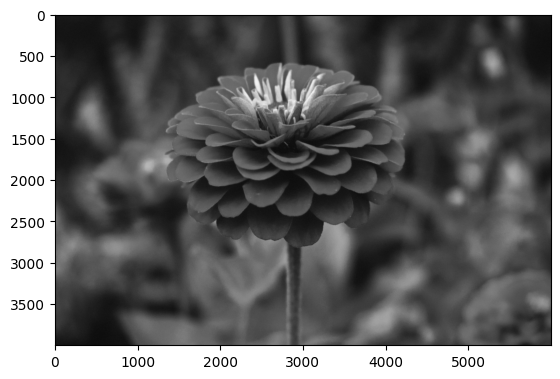

In [36]:
uniform_noise = np.random.randint(0, 30, image_gray.shape).astype("uint8")
image_noise_uniform = cv2.add(image_gray, uniform_noise)
plt.imshow(image_noise_uniform, cmap = "gray")

In [40]:
from skimage.metrics import structural_similarity, mean_squared_error

image_gauss_median3 = cv2.medianBlur(image_noise_gauss, 3)
image_gauss_median5 = cv2.medianBlur(image_noise_gauss, 5)
image_gauss_gauss33 = cv2.GaussianBlur(image_noise_gauss,(3,3),0)
image_gauss_gauss55 = cv2.GaussianBlur(image_noise_gauss,(5,5),0)
image_gauss_bilat9 = cv2.bilateralFilter(image_noise_gauss,9,75,75)
image_gauss_bilat15 = cv2.bilateralFilter(image_noise_gauss,15,100,100)
image_gauss_fastNl10 = cv2.fastNlMeansDenoising(image_noise_gauss, h=10, templateWindowSize=7)
image_gauss_fastNl20 = cv2.fastNlMeansDenoising(image_noise_gauss, h=20, templateWindowSize=7)

images = {'Медианный (3x3)': image_gauss_median3, 'Медианный (5x5)': image_gauss_median5
          , 'Гаусcа (3x3)': image_gauss_gauss33, 'Гаусcа (5x5)': image_gauss_gauss55
          , 'Билатериальный (9,75,75)': image_gauss_bilat9, 'Билатериальный (15,100,100)': image_gauss_bilat15
          , 'Cредних h=10': image_gauss_fastNl10, 'Cредних h=20': image_gauss_fastNl20}

def get_res(filter) -> list:
    mse_sp_median = mean_squared_error(image_gray, filter)
    (ssim_sp_median, diff) = structural_similarity(image_gray, filter, full=True)
    return [mse_sp_median, ssim_sp_median]

images_place = sorted(((k, get_res(v)) for k, v in images.items()), key=lambda x: x[1][1], reverse=True)

for i, k in enumerate(images_place, 1):
    print(f'{i}: {k[0]}, MSE {k[1][0]}, SSM {k[1][1]}')

1: Cредних h=20, MSE 148.05789958333332, SSM 0.7978658369372303
2: Билатериальный (15,100,100), MSE 148.39894083333334, SSM 0.7929958106366091
3: Билатериальный (9,75,75), MSE 146.37098516666666, SSM 0.769661974882267
4: Медианный (5x5), MSE 49.46967458333334, SSM 0.7443484049380408
5: Гаусcа (5x5), MSE 173.75263745833334, SSM 0.6802198053059625
6: Медианный (3x3), MSE 88.11573533333333, SSM 0.6023819787959953
7: Гаусcа (3x3), MSE 191.903614625, SSM 0.5900213611551457
8: Cредних h=10, MSE 254.01425008333334, SSM 0.4384306920572253


In [42]:
from skimage.metrics import structural_similarity, mean_squared_error

image_gauss_median3 = cv2.medianBlur(image_noise_uniform, 3)
image_gauss_median5 = cv2.medianBlur(image_noise_uniform, 5)
image_gauss_gauss33 = cv2.GaussianBlur(image_noise_uniform,(3,3),0)
image_gauss_gauss55 = cv2.GaussianBlur(image_noise_uniform,(5,5),0)
image_gauss_bilat9 = cv2.bilateralFilter(image_noise_uniform,9,75,75)
image_gauss_bilat15 = cv2.bilateralFilter(image_noise_uniform,15,100,100)
image_gauss_fastNl10 = cv2.fastNlMeansDenoising(image_noise_uniform, h=10, templateWindowSize=7)
image_gauss_fastNl20 = cv2.fastNlMeansDenoising(image_noise_uniform, h=20, templateWindowSize=7)

images = {'Медианный (3x3)': image_gauss_median3, 'Медианный (5x5)': image_gauss_median5
          , 'Гаусcа (3x3)': image_gauss_gauss33, 'Гаусcа (5x5)': image_gauss_gauss55
          , 'Билатериальный (9,75,75)': image_gauss_bilat9, 'Билатериальный (15,100,100)': image_gauss_bilat15
          , 'Cредних h=10': image_gauss_fastNl10, 'Cредних h=20': image_gauss_fastNl20}

def get_res(filter) -> list:
    mse_sp_median = mean_squared_error(image_gray, filter)
    (ssim_sp_median, diff) = structural_similarity(image_gray, filter, full=True)
    return [mse_sp_median, ssim_sp_median]
images_place = sorted(((k, get_res(v)) for k, v in images.items()), key=lambda x: x[1][1], reverse=True)

for i, k in enumerate(images_place, 1):
    print(f'{i}: {k[0]}, MSE {k[1][0]}, SSM {k[1][1]}')

1: Cредних h=10, MSE 221.34733883333334, SSM 0.7930614109849999
2: Гаусcа (5x5), MSE 223.637890375, SSM 0.7849912038008457
3: Cредних h=20, MSE 222.80085691666667, SSM 0.7814107767579337
4: Билатериальный (15,100,100), MSE 223.53529108333333, SSM 0.7793577934030719
5: Билатериальный (9,75,75), MSE 223.46150358333333, SSM 0.7778422892614631
6: Гаусcа (3x3), MSE 226.66184283333334, SSM 0.7696839912731214
7: Медианный (5x5), MSE 229.96435445833333, SSM 0.7255637694409142
8: Медианный (3x3), MSE 237.26813775, SSM 0.6776248972126117
